In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom
import zipfile
import os


In [11]:

zip_path = "/content/Insurance.csv.zip"  #
extract_path = "/content/insurance.csv"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")

Dataset extracted successfully.


In [12]:

dataset_path = os.path.join(extract_path, "insurance.csv")  # Ensure correct path
df = pd.read_csv(dataset_path)


In [13]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [14]:
print(df.isnull().sum())
print(df['smoker'].value_counts())
p_smoker = 0.3
n = 10
k = 4

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


Probability of at least 4 smokers in a random sample of 10: 0.3504


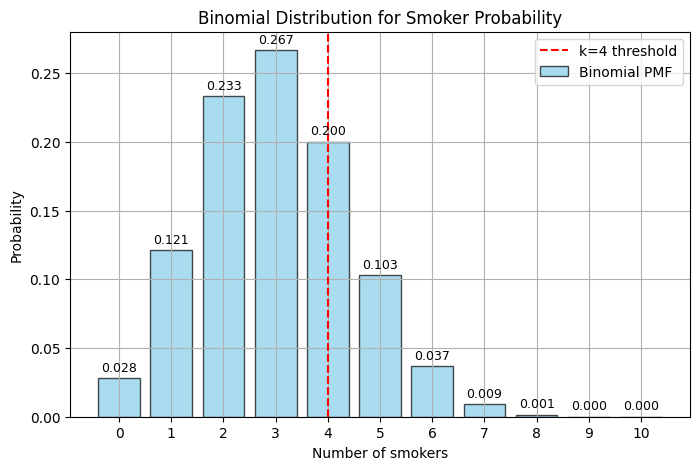

In [16]:
#(a) Compute probability P(X >= 4) using Binomial formula
prob_at_least_4 = 1 - binom.cdf(k-1, n, p_smoker)
print(f"Probability of at least 4 smokers in a random sample of 10: {prob_at_least_4:.4f}")

# (b) Plot the Binomial Distribution
x = np.arange(0, n+1)
y = binom.pmf(x, n, p_smoker)

plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue', edgecolor='black', alpha=0.7, label='Binomial PMF')
plt.xlabel('Number of smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution for Smoker Probability')
plt.xticks(x)
plt.axvline(x=k, color='r', linestyle='--', label='k=4 threshold')

for i in range(len(x)):
    plt.text(x[i], y[i] + 0.005, f'{y[i]:.3f}', ha='center', fontsize=9)

plt.legend()
plt.grid()
plt.show()



In [17]:
p_expense = 0.2  # Assumed probability of having medical expenses above $20,000
n_expense = 15  # Number of trials
k_expense = 5  # Exactly 5 individuals

In [18]:
# (a) Compute probability P(X = 5) using Binomial formula
prob_exact_5 = binom.pmf(k_expense, n_expense, p_expense)
print(f"Probability of exactly 5 individuals having expenses above $20,000: {prob_exact_5:.4f}")

Probability of exactly 5 individuals having expenses above $20,000: 0.1032


In [19]:
# (b) Compute cumulative probability P(X ≤ 5)
prob_at_most_5 = binom.cdf(k_expense, n_expense, p_expense)
print(f"Cumulative probability of at most 5 individuals having expenses above $20,000: {prob_at_most_5:.4f}")

Cumulative probability of at most 5 individuals having expenses above $20,000: 0.9389


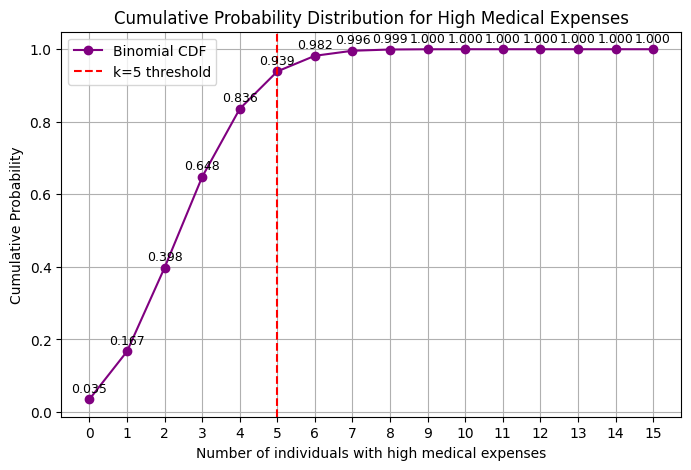

In [20]:
# (c) Plot the Cumulative Distribution Function (CDF) for high medical expenses
x_expense = np.arange(0, n_expense+1)
y_expense = binom.cdf(x_expense, n_expense, p_expense)

plt.figure(figsize=(8, 5))
plt.plot(x_expense, y_expense, marker='o', linestyle='-', color='purple', label='Binomial CDF')
plt.xlabel('Number of individuals with high medical expenses')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Probability Distribution for High Medical Expenses')
plt.xticks(x_expense)
plt.axvline(x=k_expense, color='r', linestyle='--', label='k=5 threshold')

for i in range(len(x_expense)):
    plt.text(x_expense[i], y_expense[i] + 0.02, f'{y_expense[i]:.3f}', ha='center', fontsize=9)

plt.legend()
plt.grid()
plt.show()


In [21]:
# (a) Simulate 1000 samples for each region with n=50 individuals
regions = {"Southwest": 0.25, "Southeast": 0.30, "Northwest": 0.20, "Northeast": 0.35}
n_region = 50
simulated_data = {region: np.random.binomial(n_region, prob, 1000) for region, prob in regions.items()}

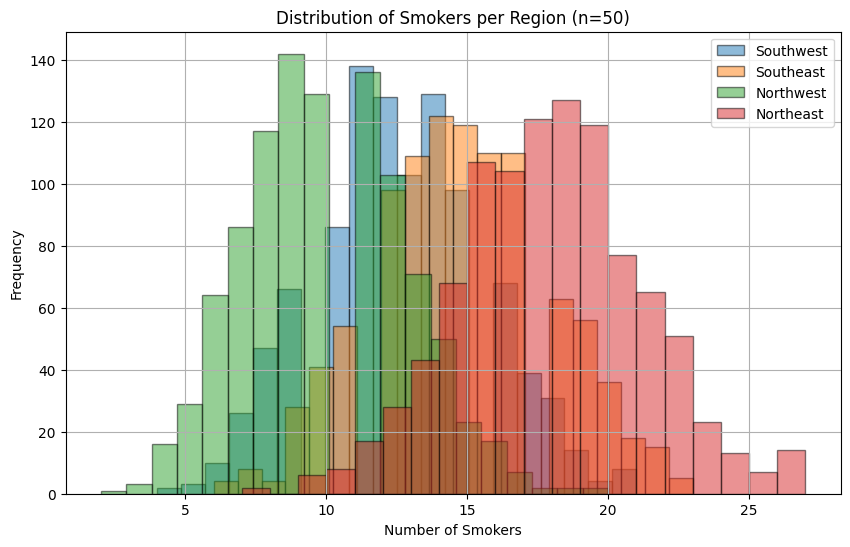

In [22]:
# (b) Visualize the distribution of smokers per region
plt.figure(figsize=(10, 6))
for region, data in simulated_data.items():
    plt.hist(data, bins=20, alpha=0.5, label=region, edgecolor='black')

plt.xlabel('Number of Smokers')
plt.ylabel('Frequency')
plt.title('Distribution of Smokers per Region (n=50)')
plt.legend()
plt.grid()
plt.show()


In [23]:
# (c) Compute the expected number of smokers per region for n=50
expected_smokers = {region: n_region * prob for region, prob in regions.items()}
for region, expected in expected_smokers.items():
    print(f"Expected number of smokers in {region} for n=50: {expected:.2f}")

# Compare expected with simulated mean values
simulated_means = {region: np.mean(data) for region, data in simulated_data.items()}
for region, mean_value in simulated_means.items():
    print(f"Simulated mean number of smokers in {region} for n=50: {mean_value:.2f}")


Expected number of smokers in Southwest for n=50: 12.50
Expected number of smokers in Southeast for n=50: 15.00
Expected number of smokers in Northwest for n=50: 10.00
Expected number of smokers in Northeast for n=50: 17.50
Simulated mean number of smokers in Southwest for n=50: 12.59
Simulated mean number of smokers in Southeast for n=50: 14.82
Simulated mean number of smokers in Northwest for n=50: 9.91
Simulated mean number of smokers in Northeast for n=50: 17.47


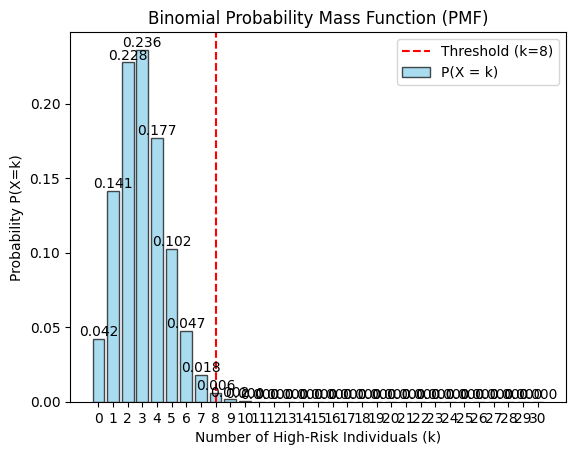

Threshold insurance charge for top 10% high-risk individuals: 5
Probability of selecting exactly 8 high-risk individuals: 0.0058


In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given probability of high medical charges (top 10% classified as high-risk)
p_high_risk = 0.10
n = 30
k = 8

# (a) Find the threshold insurance charge for top 10% using quantile function (qbinom equivalent)
threshold = stats.binom.ppf(0.90, n, p_high_risk)

# (b) Compute probability of selecting exactly 8 high-risk individuals using Binomial PMF (dbinom equivalent)
prob_exactly_8 = stats.binom.pmf(k, n, p_high_risk)

# (c) Plot the Probability Mass Function (PMF)
x = np.arange(0, n + 1)
y = stats.binom.pmf(x, n, p_high_risk)

plt.bar(x, y, color='skyblue', edgecolor='black', alpha=0.7, label="P(X = k)")
plt.axvline(k, color='red', linestyle='dashed', label="Threshold (k=8)")
plt.xlabel("Number of High-Risk Individuals (k)")
plt.ylabel("Probability P(X=k)")
plt.title("Binomial Probability Mass Function (PMF)")
plt.xticks(x)

for i in range(len(x)):
    plt.text(x[i], y[i] + 0.002, f"{y[i]:.3f}", ha='center', fontsize=10)

plt.legend()
plt.show()

# Print results
print(f"Threshold insurance charge for top 10% high-risk individuals: {threshold:.0f}")
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_exactly_8:.4f}")

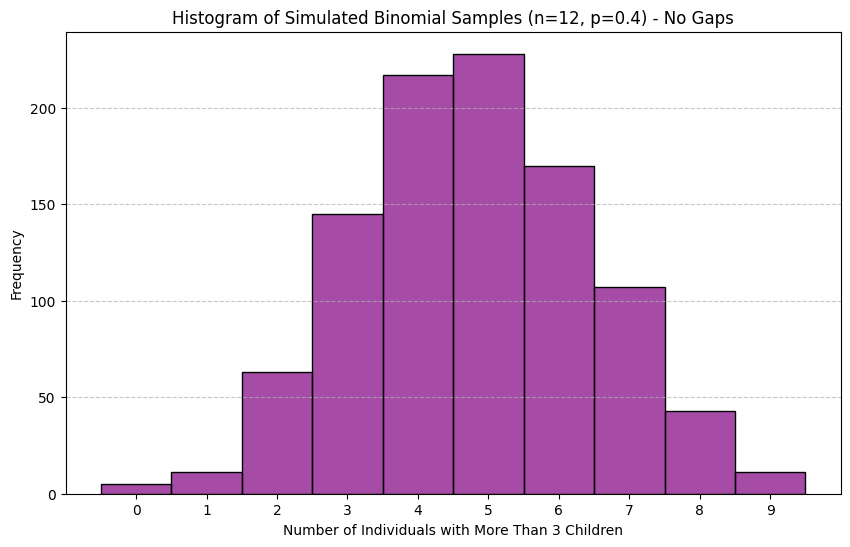

       Probability of at least 5 (pbinom)  Probability of at least 5 (manual)  \
Value                            0.561822                            0.561822   

       Theoretical Mean  Simulated Mean  Theoretical Variance  \
Value               4.8           4.792                  2.88   

       Simulated Variance  
Value            2.782736  


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

p_more_than_3_children = 0.40
n = 12
p_at_least_5 = 1 - binom.cdf(4, n, p_more_than_3_children)

p_manual = sum(binom.pmf(k, n, p_more_than_3_children) for k in range(5, n + 1))
num_simulations = 1000
simulated_samples = binom.rvs(n, p_more_than_3_children, size=num_simulations)

theoretical_mean = n * p_more_than_3_children
theoretical_variance = n * p_more_than_3_children * (1 - p_more_than_3_children)

simulated_mean = simulated_samples.mean()
simulated_variance = simulated_samples.var()

min_value, max_value = simulated_samples.min(), simulated_samples.max()
bins = np.arange(min_value, max_value + 1.5) - 0.5
plt.figure(figsize=(10, 6))
sns.histplot(simulated_samples, bins=bins, kde=False, color='purple', alpha=0.7, discrete=True)

plt.xlabel("Number of Individuals with More Than 3 Children")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Binomial Samples (n=12, p=0.4) - No Gaps")
plt.xticks(np.arange(min_value, max_value + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

comparison_results = {
    "Probability of at least 5 (pbinom)": p_at_least_5,
    "Probability of at least 5 (manual)": p_manual,
    "Theoretical Mean": theoretical_mean,
    "Simulated Mean": simulated_mean,
    "Theoretical Variance": theoretical_variance,
    "Simulated Variance": simulated_variance
}

print(pd.DataFrame(comparison_results, index=["Value"]))